# 8. Decision Tree Classifier for Diabetes Prediction

## Introduction to Decision Trees

A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It is a tree-like model where each internal node represents a feature (attribute), each branch represents a decision rule, and each leaf node represents the outcome or class label. The tree is constructed by recursively splitting the data based on the feature that provides the most information gain until a stopping criterion is met.

Decision trees have several advantages:
- They are easy to understand and interpret.
- They can handle both categorical and numerical data.
- They require little data preparation and can handle missing values.
- They are robust to outliers and can capture non-linear relationships.

However, decision trees also have some limitations:
- They can be prone to overfitting if the tree becomes too complex.
- They may not perform well with imbalanced datasets.
- They may have high variance and can be sensitive to small changes in the training data.

## Project Overview

In this project, we will be using a decision tree classifier to predict the presence of diabetes based on various features. The dataset used is the Pima Indians Diabetes Dataset, which contains information about female patients at least 21 years old of Pima Indian heritage.

The steps involved in this project are as follows:

1. Load the dataset and perform data preprocessing:
   - Remove rows where 'Glucose' or 'BloodPressure' are zero.
   - Separate the features (X) and the target variable (y).

2. Split the data into training and testing sets using `train_test_split` from scikit-learn.

3. Create an instance of the `DecisionTreeClassifier` and train it on the training data using the `fit` method.

4. Make predictions on the test set using the trained classifier and calculate the accuracy using `accuracy_score` from scikit-learn.

5. Export the decision tree rules using `export_text` from scikit-learn to visualize the decision-making process of the classifier.

6. Plot the decision tree using `plot_tree` from scikit-learn to provide a graphical representation of the tree structure.

7. Evaluate the performance of the decision tree classifier:
   - Calculate the accuracy on the test set.
   - Generate a confusion matrix using `confusion_matrix` from scikit-learn to assess the model's performance in terms of true positives, true negatives, false positives, and false negatives.
   - Visualize the confusion matrix using a heatmap plot with Seaborn library.

By following these steps, we aim to build a decision tree classifier that can accurately predict the presence of diabetes based on the given features. The exported tree rules and the plotted decision tree will provide insights into the decision-making process of the classifier.

## Code Implementation

Let's dive into the code implementation of the decision tree classifier for diabetes prediction.

1. load and clean the data

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
data = pd.read_csv(file_path)

# Remove rows where 'Glucose' or 'BloodPressure' are zero
data = data[(data['Glucose'] != 0) & (data['BloodPressure'] != 0)]

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']
feature_names = X.columns.tolist()  # Get feature names from the dataset

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Create and train the decision tree

In [9]:
# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

3. Predict and evaluate

In [10]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7602739726027398


Then we try to plot the decision tree

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- Pregnancies <= 7.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  7.00
|   |   |   |   |--- class: 1
|   |   |--- BMI >  30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.90
|   |   |   |   |--- BMI <= 45.40
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |   |--- BMI <= 31.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- BMI >  31.10
|   |   |   |   |   |   |   |--- SkinThickness <= 8.00
|   |   |   |   |   |   |   |   |--- Glucose <= 107.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- 

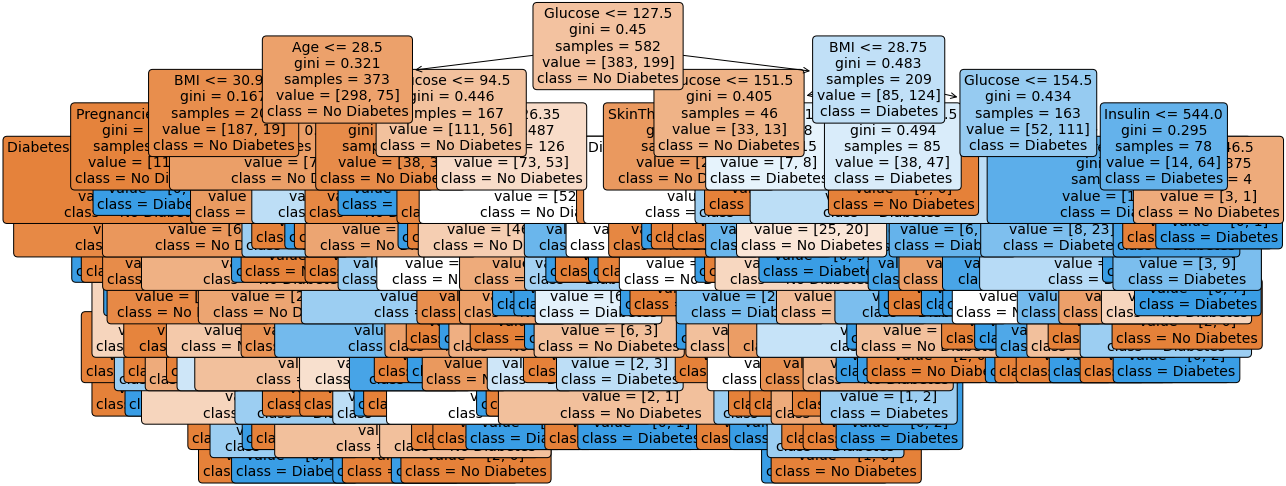

In [11]:
# Export the decision tree rules
tree_rules = export_text(dt_classifier, feature_names=feature_names)
print(tree_rules, "\n")

# Plot the decision tree
plt.figure(figsize=(20, 8))
plot_tree(dt_classifier, feature_names=feature_names, class_names=['No Diabetes', 'Diabetes'], rounded=True, filled=True, fontsize=14)
plt.show()

Then in the next step, we need to evaluate the tree.

Accuracy: 0.7602739726027398
Confusion Matrix:
[[78 17]
 [18 33]]


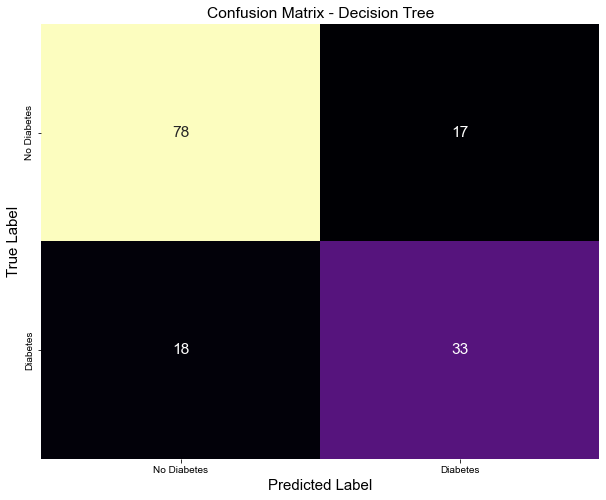

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicted values on the testing data
test_pred_decision_tree = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_pred_decision_tree)
print(f"Accuracy: {accuracy}")

# Confusion matrix
confusion_matrix = confusion_matrix(y_test, test_pred_decision_tree)
print("Confusion Matrix:")
print(confusion_matrix)

# Plot the confusion matrix
matrix_df = pd.DataFrame(confusion_matrix, index=['No Diabetes', 'Diabetes'], columns=['No Diabetes', 'Diabetes'])

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma", cbar=False)
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()